#<font color='navy' size=10pt >Confidence Intervals Applications to Reinforcement Learning</font>

In [ ]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

## <font color='blue'> Reinforcement Learning - Motivation & Framework

*Motto : "Errare humanum est, perseverare autem diabolicum"*

### Reference:

<figure>
<center>
<img src='https://m.media-amazon.com/images/I/81qAc-ghXrL._SY522_.jpg'width='300px'/>
<figcaption><a href="https://www.amazon.com/Reinforcement-Learning-Introduction-Adaptive-Computation/dp/0262039249/ref=sr_1_2?crid=EP0RD0JHFNNN&keywords=barto+sutton&qid=1695067234&sprefix=barto+sutton%2Caps%2C94&sr=8-2&ufe=app_do%3Aamzn1.fos.18ed3cb5-28d5-4975-8bc7-93deae8f9840" target="_blank">Reinforcement Learning - An Introduction</a></figcaption> </td></center>
</figure>


If we would like to design a robot or a machine that makes autonomous decisions how can we possibly achieve that?

The Challenge: There are so many choices to be made (paths, courses of action, etc.), so which one is worth pursuing and how the machine can be programmed to start learning how to make good choices?

One possible answer is to consider a Markov Decision Process framework (MDP).

The learner and decision maker is called the *agent*. The thing it interacts with, comprising everything outside the agent, is called the *environment*.

<figure>
<center>
<img src='https://drive.google.com/uc?id=11j6_ZuibprlkhhXUlauK-ppcbgHdu4kt'width='600px'/>
<figcaption>The agent-environment interaction in a Markov decision process.</figcaption></center>
</figure>

The MDP and agent together give rise to a sequence or trajectory in time, such as:

$$S_0,A_0,R_1,S_1,A_1,R_2,S_2,A_2,R_3,\dots,S_t,A_t,R_{t+1},\dots$$

In a finite MDP, the sets of states, actions, and rewards $\left(S, A, \text{and}\, R\right)$ all have a finite number of elements. In this case, the random variables $R_t$ and $S_t$ have well defined discrete probability distributions dependent only on the preceding state and action.

If a state includes information about all aspects of the past agent-environment interaction that make a difference for the future, then the state is said to have the *Markov property.*



Real world examples:
    - Compare 5 different advertisements (“thing you spend money on”) to see which has the best return.
    - Compare three different studying habits to see which is better.

An advantage of reinforcement learning is that it focuses on getting a better answer as you go (learn more), so you can hypothetically make a better choice earlier compared to a classical randomized trial.

However as we will see, there is no magic! Everything comes at a price..

For our example, the intuitive framework is based on casino games or slot machines

## <font color='blue'> Example: An N-Armed Bandit Problem

### Terminology

The setup can also be seen as a casino game problem. Suppose you have to choose among k different options or actions repeatedly. After each choice, you receive a numerical reward from a stationary probability distribution that depends on your selected action. Your objective is to maximize the expected total reward over some time, for example, over many action selections or time steps.

We want to determine the values of actions and use these estimates to make action selection decisions.

A natural way to estimate this is by averaging the rewards actually received:

$$Q_t(a)\overset{\Delta}{=}\frac{\text{sum of rewards when}\,a\,\text{taken prior to}\,t}{\text{number of times}\,a\,\text{taken prior to}\,t}=\frac{\displaystyle\sum\limits_{i=1}^{t-1}R_i\cdot \mathbb{1}_{A_i=a}}{\displaystyle\sum\limits_{i=1}^{t-1}\mathbb{1}_{A_i=a}}$$

The *greedy* action selection is defined as:

$$A_t\overset{\Delta}{=}\underset{a}{\text{argmax}}Q_t(a)$$

Greedy action selection always exploits current knowledge to maximize immediate reward; it spends no time at all sampling apparently inferior actions to see if they might really be better. A simple alternative is to behave greedily most of the time, but every once in a while, say with small probability $\epsilon$, instead select randomly from among all the actions with equal probability, independently of the action-value estimates. We call methods using this near-greedy action selection rule $\epsilon$-greedy methods.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1r7xHuqYsiJFSqWRd76zIPbIRMSO6tg-A'width='600px'/>
<figcaption>Pseudo-Code for an $\epsilon$-greedy method</figcaption></center>
</figure>


**Agent** - Algorithm that can perform actions, for example, picking slot machines. If we assume that the distribution of rewards is not changing as the agent interacts with the environment, then we call the problem stationary.

**Actions**  - Example: pick a slot machine (say between 1-20 if we had a total of 20 different slot machines)

**Environment** - Unknown probabilities of return from machines.

**States** - state(0) = no knowledge about machines; at each state(n) you have an increasing amount of information about the machines.

**Reward** - How much you get back each time you pull a lever.

**Policy** - In general, a rule to update the actions given knowledge of the sates. Formally, a mapping from the set of states into the set of conditional probabilities of taking actions given states. One choice could be the upper confidence bound selection strategy.

**Expected Value** - The long-term expected result of a given policy. Our algorithm doesn’t explicitly use this, only the immediate reward expectation.  

Solution: N-armed bandit problem that can be solved more effectively with an Upper Confidence Bound algorithm that, by its design, balances better the exploitation and the exploration.

Big ideas and theoretical concepts applied in the algorithm: Central Limit Theorem, Confidence Intervals and the Chernoff-Hoeffding Inequality



## <font color='blue'> Central Limit Theorem

If X is a random variable and we consider the sampling of X with sample sizes greater than 30 then the distribution of the sample means is almost normally distributed.

$$\text{If the sample size }n\,\, \text{increases, then } \bar{X}\sim  N\left(\mu_X,\frac{\sigma_X}{\sqrt{n}}\right)$$

where $\bar{x}$ represents the sample mean.

<font color='red'>**Big Idea:**</font> the random variable X may follow some unknown distribution however, if we consider sampling from X with sample sizes that are big, then the distribution of the corresponfing sample means is almost normal.

<font color='red'>**Recommended Instructional Video:**</font> https://www.youtube.com/watch?v=oPQ4mNcqY7k&t=304

## The Meaning in terms of Probability

$$\large \text{P}\left(\left|\bar{X}-\mu\right|<d\right)>1-\alpha$$

Here $1-\alpha$ is the confidence level.

We have that

$$\large \left|\bar{X}-\mu\right|<d $$

means

$$\large \bar{X}-d<\mu<\bar{X}+d$$

We call this distance $d$ margin of error and from CLT we have that

$$d:= z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$$

## Confidence intervals

The idea is to "trap" the value of a population mean inside an interval built around a sample mean, for example:


<figure>
<center>
<img src='https://drive.google.com/uc?id=1Vc31EI2dhYA9J-exOEoJQAcaygghhZHV'width='600px'/>
<figcaption>Example of Confidence Intervals</figcaption></center>
</figure>






In the picture above we had an intuitive replresentation of this fact, the true value of the mean is "trapped" inside most of the confidence intervals constructed around sample means from different simple random samples drawn from the same population.

Am more detailed picture representing this idea is the following, showing how a 95% confidence interval is working for estimating a population proportion:


<figure>
<center>
<img src='https://drive.google.com/uc?id=1cmPYiZQ4mM139f1DRGMDDKkYP02tpxQ1'width='600px'/>
<figcaption>Confidence Intervals</figcaption></center>
</figure>


Confidence intervals for a population mean:

$$\large [\bar{X}-E,\bar{X}+E]$$

where

$$\large E:= t_{\alpha/2}\cdot\frac{s}{\sqrt{n}}$$

## <font color='blue' size=6> Chernoff Bounds

This concept helps us determine a rough estimate for the upper bound of the confidence intervals "on-the-fly".

**Theorem** Let $X=\sum_{i=1}^{n}X_i,$ where $X_i=1$ with probability $p_i$ and $X_i=0$ with probability $1-p_i$, and all $X_i$ are independent. Let $\mu=\mathbb{E}(X)=\sum_{i=1}^{n}p_i.$ Then

i) **(Upper Tail)** $\large \text{P}(X\geq(1+\delta)\mu)\leq e^{-\frac{\delta^2}{2+\delta}\mu}$

ii) **(Lower Tail)** $\large \text{P}(X\leq(1-\delta)\mu)\leq e^{-\frac{\mu\delta^2}{2}}$

A Chernoff bound can be determined in a more general setup:
<figure>
<left>
<img src='https://drive.google.com/uc?id=1YO2_oBFT15BFR-VPcaMIRfxwg-9Ad46w'width='800px'/>
<figcaption></figcaption></center>
</figure>



<figure>
<left>
<img src='https://drive.google.com/uc?id=1X4atCKFDEaC0dLe2X4SJHXLEZt3Zg8Al'width='800px'/>
<figcaption></figcaption></center>
</figure>


This sounds really complicated but in simple words, it says that by playing all "slot machines" a couple of times we are able to approximate the one that has a better return value by looking at the upper bounds for the different confidence intervals. So, in conclusion, learning comes at a price...

## <font color='blue' size=6> The Bandit Algorithm (or Upper-Confidence-Bound Action Selection)

If we index the different slot machines by $i$ where $1\leq i\leq d$ and we assume that the $i^{th}$ machine was played $n$ times then the upper bound estimate for the confidence interval for the $i^{th}$ machine is

$$\bar{X_i} + c\sqrt{\frac{\ln(k)}{n}}$$

where $k$ represents the total number of times any game was played so far.

As a more intuitive example we can imagine a game with five slot machines:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1-NtZ-q8Vs1gnQfYDzBqBKCHAxSjhUmJg'width='800px'/>
<figcaption></figcaption></center>
</figure>


<figure>
<center>
<img src='https://drive.google.com/uc?id=1eFMAj_WeOG0ObWhsdFWACahrD1OsER8K'width='800px'/>
<figcaption></figcaption></center>
</figure>

Critical thinking question: Which machine will be picked in the end by applying the Bandit Algorithm?

In [1]:
import numpy as np
from scipy.stats import norm, beta, triang, uniform, bernoulli
import matplotlib.pyplot as plt

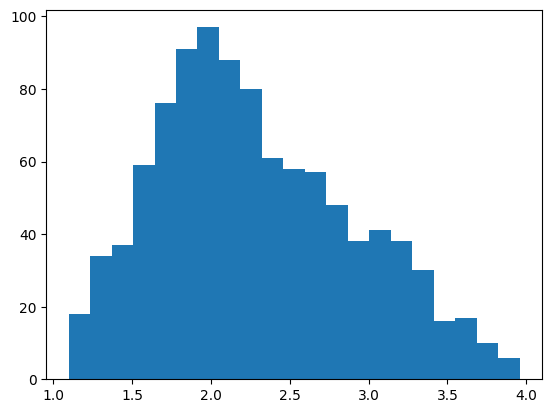

In [22]:
# this is how we generate a slot machine
# we describe the distrubution of rewards
# this is a secret to the player, it is only known by the casino owner
rewards = triang.rvs(size=1000,loc=1,scale=3,c=0.3)
plt.hist(rewards,bins=21)
plt.show()

The triangular distribution can be represented with an up-sloping line from loc to $(loc + c\cdot scale)$ and then downsloping for $(loc + c\cdot scale)$ to $(loc + scale).$

In [23]:
# We define the machines and their rewards
def Casino(machine): # here we make a Casino with many slot machines

    if(machine == 1):
        return round(norm.rvs(loc=0,scale=1),2)

    if(machine == 2):
        return round(uniform.rvs(loc=0.1,scale=1),2)

    if(machine>=3 and machine <=10):
        return round(triang.rvs(loc=0,scale=1,c=0.5),2)

    if(machine >=11 and machine <=14):
        return round(triang.rvs(loc=0.5,scale=1,c=0.5),2)

    if(machine == 15): # this is the lucky one
        return round(triang.rvs(loc=0.8,scale=3.2,c=1/16),2)

    if(machine >= 16 and machine <= 20):
        return round(uniform.rvs(0,scale=1.25),2)

    if(machine >20):
        print("There are only 20 slot machines!")


In [30]:
Casino(5)

0.58

In [18]:
Casino(2)

0.56

In [ ]:
rv = []
for i in range(1000):
  rv.append(round(triang.rvs(loc=1.2,scale=3,c=0.4),2))


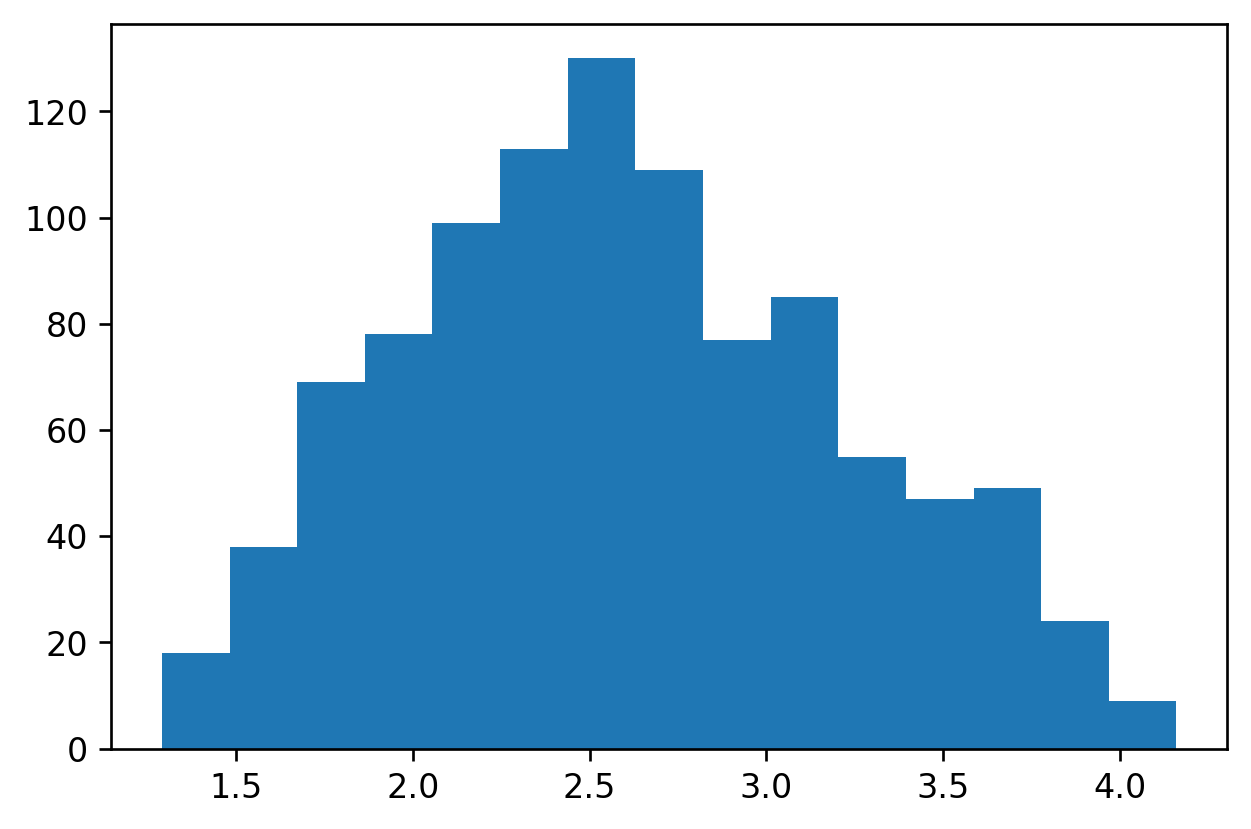

In [ ]:
plt.hist(rv,bins=15)
plt.show()

## What if we play just one machine such as machine no. 1

In [ ]:
cash = 25
spin = 1
while(cash>1):
    print("Spin: " + str(spin))
    winnings = Casino(machine=1)
    print("I got " + str(winnings))
    cash = (cash-1) + winnings
    print("I now have $" + str(cash))
    spin = spin +1

## This is the implementation of the UCB algorithm

In [ ]:
np.random.randint(21)

16

## What happens if we play with totally random choices

In [35]:
# this is playing all machines by random choices
N = 500
d = 20
machine_record = []
award_record = []
balance = 200.0
for n in range(N):
    machine_choice = np.random.randint(1,d+1) # we choose a random machine each time
    machine_record.append(machine_choice)
    cash_reward = Casino(machine = machine_choice)
    award_record.append(cash_reward)
    balance = (balance - 1.0) + cash_reward

In [ ]:
sum(np.array(machine_record)==20)

119

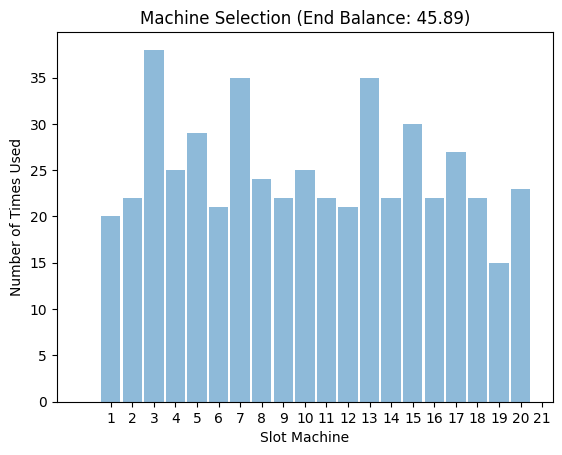

In [36]:
plt.hist(machine_record,bins=range(22),rwidth=0.9, alpha=0.5,align='left')
plt.title("Machine Selection (End Balance: "+ str(round(balance,2))+")")
plt.xlabel("Slot Machine")
plt.ylabel("Number of Times Used")
plt.xticks(np.arange(1,22,1))
plt.show()

In [ ]:
[-1.1] *3

[-1.1, -1.1, -1.1]

## Computational Diagram

<figure>
<center>
<img src='https://drive.google.com/uc?id=1dCT-oV45TvOMBdApE_-Vwm1YFLOqkJEi'width='500px'/>
<figcaption></figcaption></center>
</figure>



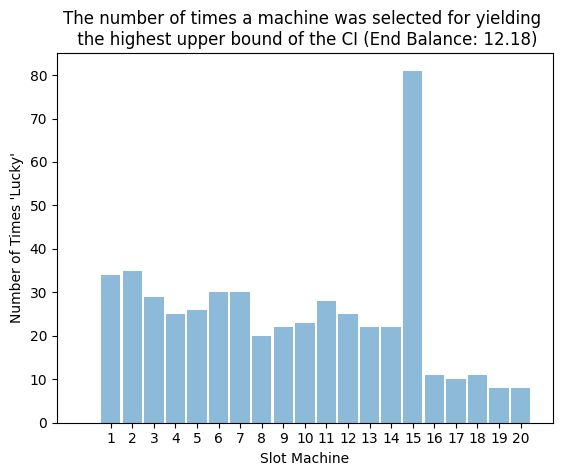

In [39]:
# this is the actual UCB algorithm (a.k.a. "the bandit algorithm")
N = 500
n = 1
d = 20
machine_record = []
award_record = []
balance = 100

c = 2 # we can provide a "guess" for the constant (hyperparameter) c
number_of_selections = [0] * d
sum_of_rewards = [0] * d



while n<N: # we want to play at most N times.
  machine_choice = 1
  max_upper_bound = -1e200
  # we are looping in the range of the machines' indices
  for i in range(d):
    if (number_of_selections[i] > 0):
      average_reward = sum_of_rewards[i]/number_of_selections[i]
      E = c*np.sqrt(np.log(n)/number_of_selections[i])
      upper_bound = average_reward + E
    else:
      upper_bound = 1e200


    if(upper_bound >= max_upper_bound):
      max_upper_bound = upper_bound
      machine_choice = i+1 # here i+1 is because of the way Python indexes arrays

    # here we start playing all machines in the order of labels 1->2->3..->20->1 but we keep track of how many times
    # a particular machine had produced the highest upper bound of the confidence interval of rewards.
    # we expect that the "lucky" machine had been selected most of the times for yielding the highest bound of the
    # confidence interval for rewards.
    machine_record.append(machine_choice) # here we keep track of the machines played
    number_of_selections[machine_choice-1] = number_of_selections[machine_choice-1] + 1 # we also keep track of how many times we played each machine
    award = Casino(machine=machine_choice) # the oputput of the machine played
    sum_of_rewards[machine_choice-1] = sum_of_rewards[machine_choice-1] + award # we keep track of the rewards from each machine
    balance = balance - 1 + award # here we keep track of the balance in the wallet
    n += 1

plt.hist(machine_record, bins=range(22),rwidth=0.9, alpha=0.5,align='left')
plt.title("The number of times a machine was selected for yielding \n the highest upper bound of the CI (End Balance: " + str(round(balance,2)) + ")")
plt.xlabel("Slot Machine")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Number of Times 'Lucky'")
plt.show()

In [ ]:
len(machine_record)

500

In [ ]:
machine_record

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 1,
 2,
 2,
 2,
 5,
 6,
 7,
 7,
 7,
 10,
 10,
 12,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 1,
 2,
 3,
 4,
 4,
 4,
 4,
 8,
 8,
 8,
 11,
 11,
 11,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 1,
 2,
 3,
 3,
 5,
 5,
 5,
 5,
 9,
 9,
 9,
 12,
 12,
 12,
 15,
 16,
 17,
 17,
 17,
 17,
 1,
 2,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 11,
 12,
 13,
 13,
 15,
 15,
 15,
 15,
 19,
 19,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 7,
 10,
 11,
 11,
 13,
 13,
 15,
 15,
 15,
 18,
 18,
 18,
 1,
 2,
 3,
 3,
 3,
 3,
 7,
 8,
 8,
 10,
 10,
 12,
 12,
 12,
 15,
 15,
 15,
 15,
 15,
 15,
 1,
 2,
 2,
 4,
 5,
 5,
 7,
 8,
 9,
 9,
 11,
 11,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 20,
 1,
 2,
 2,
 2,
 2,
 2,
 7,
 8,
 8,
 10,
 11,
 12,
 13,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 1,
 2,
 3,
 4,
 4,
 4,
 7,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 1,
 2,
 3,
 3,
 5,
 6,
 6,
 6,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 1,
